[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
形状: (150, 4)
前两个样本
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
降维后的维度: 3

权重系数:
 [[ 1.49112984  2.67365672 -2.86487539 -3.44807111]
 [ 1.11584298  0.81225753 -1.71331654 -2.26744518]
 [-0.02961875 -2.29357233  1.06384765 -0.70181584]
 [-1.85401618 -0.7152145   2.34404499  1.73597185]
 [-0.72333788 -0.47712742  1.17029928  4.68136028]]

常数项: [-8.42214019 -3.03799724  1.8258466  -1.25987054 -8.58622684]

转换后形状: (150, 5)

转换后的前两个样本
 [[  3.83998076   2.64357109  -5.00368864  -9.58974645 -11.37050496]
 [  2.20492643   2.01427373  -3.85097873  -8.861335

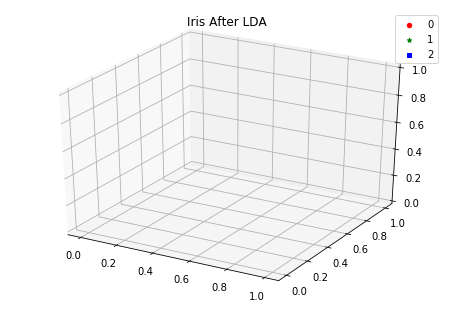

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, discriminant_analysis
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
y = [0]*30 + [1]*30 + [2]*30 + [3]*30 + [4]*30
print(y)
print("形状:",X.shape)
print("前两个样本\n", X[:2])

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=3)
lda.fit(X, y)
print("降维后的维度:", lda.n_components)
print("\n权重系数:\n", lda.coef_)
print("\n常数项:", lda.intercept_)
converted_X = np.dot(X, np.transpose(lda.coef_)) + lda.intercept_
print("\n转换后形状:", converted_X.shape)
print("\n转换后的前两个样本\n", converted_X[:2])

# 画图
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
colors = 'rgb'
markers = 'o*s'
for target, color, marker in zip([0, 1, 2], colors, markers):
    pos = y == target
    X = converted_X[pos, :]
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], color=color, marker=marker, label=target)
ax.legend(loc="best")
fig.suptitle("Iris After LDA")
plt.show()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
形状: (100, 4)
前两个样本
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
2
2

权重系数:
 [[ -2.8464883  -18.41369035  21.23175795  32.58985887]]

常数项: [-13.80323503]

转换后形状: (100, 1)

转换后的前两个样本
 [[-56.52580868]
 [-46.74966584]]


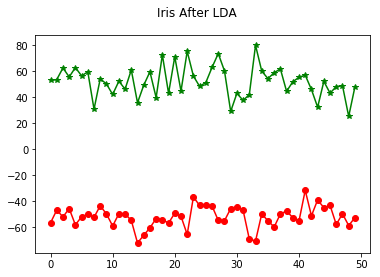

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, discriminant_analysis
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:100]
y = iris.target[:100]
print(y)
print("形状:",X.shape)
print("前两个样本\n", X[:2])

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)
print(lda.n_components)
lda.fit(X, y)
print("\n权重系数:\n", lda.coef_)
print("\n常数项:", lda.intercept_)
converted_X = np.dot(X, np.transpose(lda.coef_)) + lda.intercept_
print("\n转换后形状:", converted_X.shape)
print("\n转换后的前两个样本\n", converted_X[:2])

# 画图
fig = plt.figure()
colors = 'rgb'
markers = 'o*s'
for target, color, marker in zip([0, 1, 2], colors, markers):
    pos = (y == target).ravel()
    X = converted_X[pos, :]
    x = range(len(X))
    plt.plot(x, X[:, 0], color=color, marker=marker, label=target)
ax.legend(loc="best")
fig.suptitle("Iris After LDA")
plt.show()